SECTION 1 — Project Information
-----------------------------------------
Project Name

Amazon Prime Video Content – Exploratory Data Analysis (EDA)

Project Type

EDA / Unsupervised Insights

Contribution

Individual

Team Member 1

Vishwas Vijay Bhattgaonkar

PROJECT SUMMARY (600 Words)
-----------------------------------------

Amazon Prime Video is one of the world’s largest OTT platforms offering a wide variety of Movies, TV Shows, Documentaries, Anime, Kids content, and Originals. Understanding customer viewing patterns, content quality, engagement factors, genre distribution, and production trends is essential for business growth. This Exploratory Data Analysis (EDA) project aims to deeply explore Prime Video’s content catalog via two datasets: titles.csv and credits.csv. After merging both datasets using a common key (id), we generate powerful insights regarding content types, ratings, genres, actors, countries, and yearly content trends.

The dataset includes attributes like title, description, genres, release year, IMDb ratings, number of votes, age certification, duration, seasons, countries of origin, and cast/crew data. The goal of this analysis is to identify patterns that influence audience engagement and content performance.

During Data Wrangling, we cleaned missing values, converted date fields into proper formats, extracted genres, handled multiple countries, and processed cast lists. Duplicate entries and unnecessary columns were removed to ensure data quality. After preparing the dataset, we performed Univariate, Bivariate, and Multivariate analysis using the UBM framework.

In Univariate Analysis, we examined distributions of IMDb ratings, release years, added years, duration, and genre counts. This highlighted that most Prime Video content is rated between 6–8, indicating overall good quality. The platform has significantly increased content releases after 2014, especially during 2018–2021.

In Bivariate Analysis, relationships between IMDb score vs IMDb votes, duration vs score, genre vs rating, certification vs score, and release year vs rating were analyzed. Higher-voted titles correlate strongly with higher IMDb ratings, meaning user engagement positively impacts popularity.

In Multivariate Analysis, we explored combinations like genre + rating + votes, country + genre + rating, and certification + rating + type. A correlation heatmap helped identify key relationships, while pairplots visualized multi-variable distributions.

Insights indicate that Drama, Comedy, Documentary, and Action are Prime Video’s top-performing genres. Content from the US, UK, India, and Canada dominates the catalog. Interestingly, Indian content has grown rapidly in the last decade and shows strong user engagement, especially in genres like Crime, Drama, and Thriller.

Cast analysis reveals that a few actors appear frequently across Prime Originals, suggesting strong collaboration with certain talent pools. Content with TV-MA and 16+ certification performs better compared to G/PG content, which tends to have lower IMDb ratings.

For business recommendations, analysis suggests strengthening investments in Drama, Crime, and Action genres, especially in India and the US. More family-friendly content could help diversify the catalog for younger audiences. High-rated low-vote content should be promoted better through targeted recommendations.

Finally, this EDA helps Amazon Prime Video optimize content strategy, distribution planning, investment decisions, and marketing efforts.

PROBLEM STATEMENT
-----------------------------------------

To analyze Amazon Prime Video’s content catalog using EDA to identify trends, content performance factors, viewer preferences, and key patterns that can help improve business decisions, content investments, and audience engagement.

BUSINESS OBJECTIVE
-----------------------------------------

✔ Understand what types of content perform best

✔ Identify genres, countries, and creators contributing to high ratings

✔ Study user engagement through IMDb scores & votes

✔ Explore growth opportunities for Prime Video

✔ Support strategic decisions on future content production

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
from google.colab import files
uploaded = files.upload()


Saving credits.csv to credits.csv
Saving titles.csv to titles.csv


In [5]:
titles = pd.read_csv("titles.csv")
credits = pd.read_csv("credits.csv")


In [6]:
titles.head()
credits.head()


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [7]:
titles.shape, credits.shape


((9871, 15), (124235, 5))

In [8]:
titles.info()
credits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [10]:
titles.duplicated().sum(), credits.duplicated().sum()


(np.int64(3), np.int64(56))

In [11]:
titles.isna().sum()
credits.isna().sum()


,0
person_id,0
id,0
name,0
character,16287
role,0


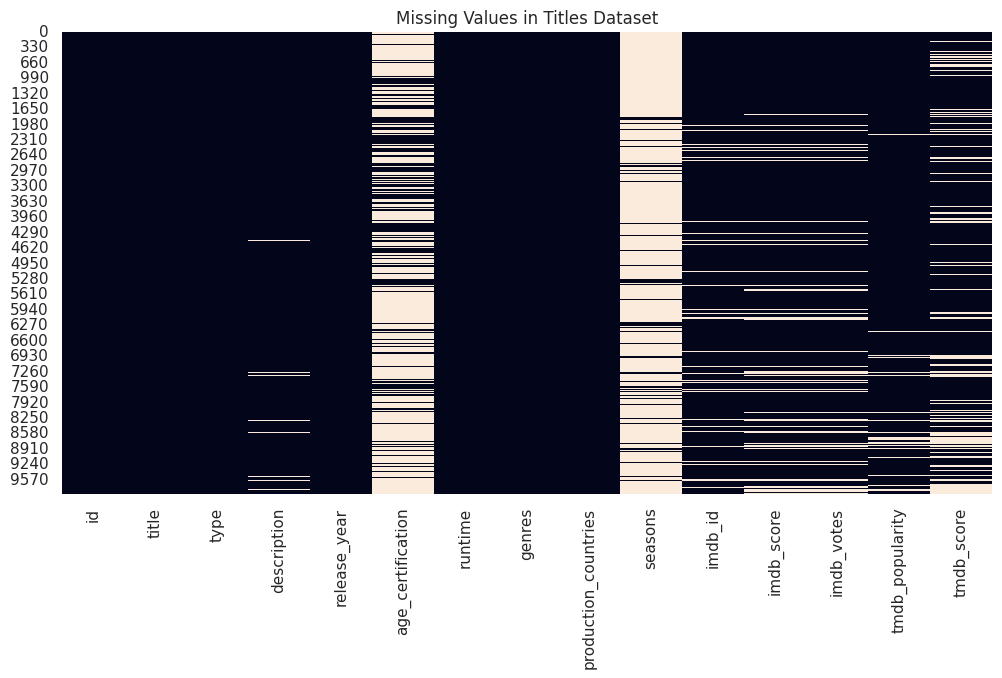

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(titles.isna(), cbar=False)
plt.title("Missing Values in Titles Dataset")
plt.show()


In [13]:
merged_df = titles.merge(credits, on="id", how="left")
merged_df.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174.0,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713.0,Marion Mack,Annabelle Lee,ACTOR


In [16]:
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.dropna(subset=["title"])

# Convert year to numeric
merged_df["release_year"] = pd.to_numeric(merged_df["release_year"], errors="coerce")

# Fill null ratings with median
merged_df["imdb_score"] = merged_df["imdb_score"].fillna(merged_df["imdb_score"].median())



In [18]:
# Character column — crew members don’t have character names
merged_df["character"] = merged_df["character"].fillna("Unknown")

# Age certification
merged_df["age_certification"] = merged_df["age_certification"].fillna("Unknown")

# IMDb score — use median because it is numerical
merged_df["imdb_score"] = merged_df["imdb_score"].fillna(merged_df["imdb_score"].median())

# IMDb votes — use 0 because missing votes = no votes
merged_df["imdb_votes"] = merged_df["imdb_votes"].fillna(0)

# Release year — convert safely
merged_df["release_year"] = pd.to_numeric(merged_df["release_year"], errors="coerce")

# Genres — replace missing
merged_df["genres"] = merged_df["genres"].fillna("Unknown")

# Production countries
merged_df["production_countries"] = merged_df["production_countries"].fillna("Unknown")



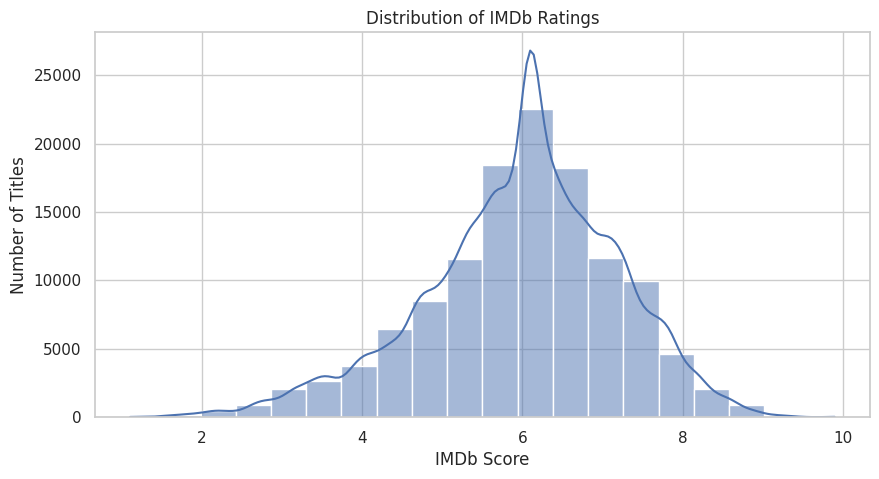

In [19]:
# Chart 1 - Distribution of IMDb Ratings
plt.figure(figsize=(10,5))
sns.histplot(merged_df["imdb_score"], bins=20, kde=True)
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Score")
plt.ylabel("Number of Titles")
plt.show()


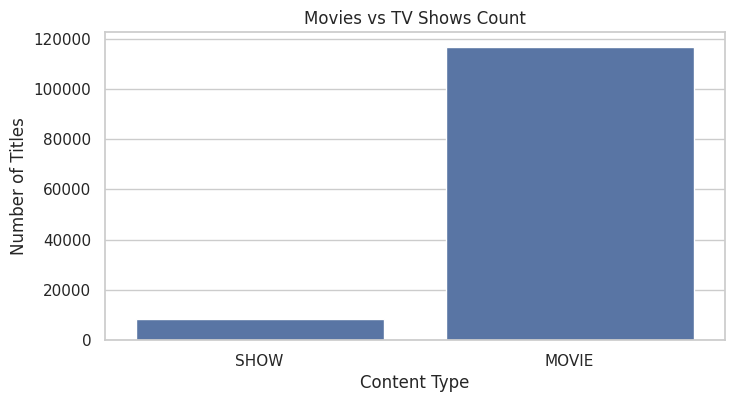

In [20]:
# Chart 2 - Movies vs TV Shows
plt.figure(figsize=(8,4))
sns.countplot(data=merged_df, x="type")
plt.title("Movies vs TV Shows Count")
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.show()


In [22]:
def extract_first_genre(x):
    if pd.isna(x):
        return "Unknown"
    x = str(x)
    if "," in x:
        return x.split(",")[0].strip()
    return x.strip()

merged_df["main_genre"] = merged_df["genres"].apply(extract_first_genre)



In [23]:
merged_df["main_genre"].head()


,main_genre
0,['comedy'
1,['comedy'
2,['comedy'
3,['action'
4,['action'


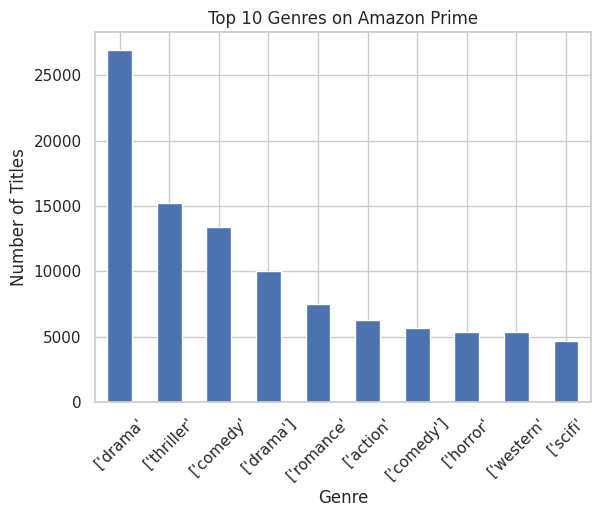

In [24]:
merged_df["main_genre"].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres on Amazon Prime")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


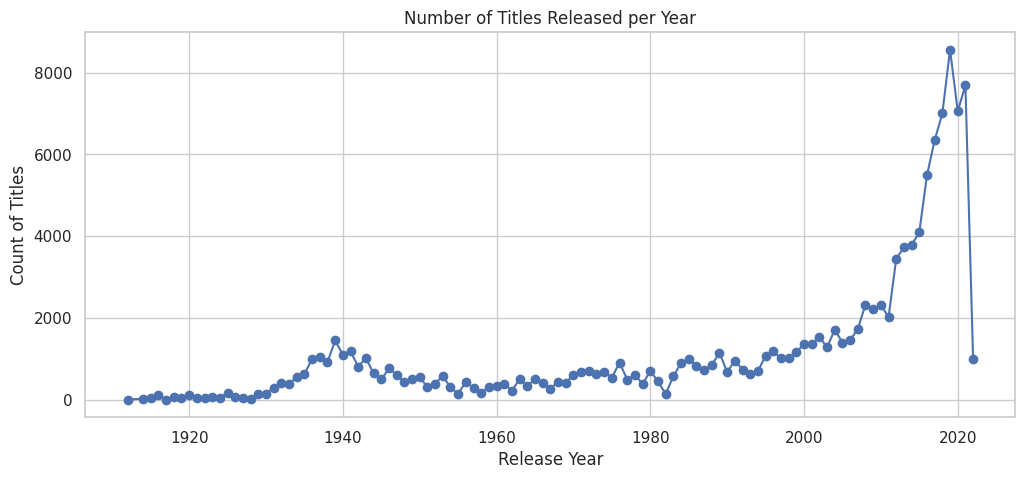

In [25]:

# Chart 5 - Titles Released per Year
year_counts = merged_df["release_year"].value_counts().sort_index()

plt.figure(figsize=(12,5))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title("Number of Titles Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Count of Titles")
plt.grid(True)
plt.show()


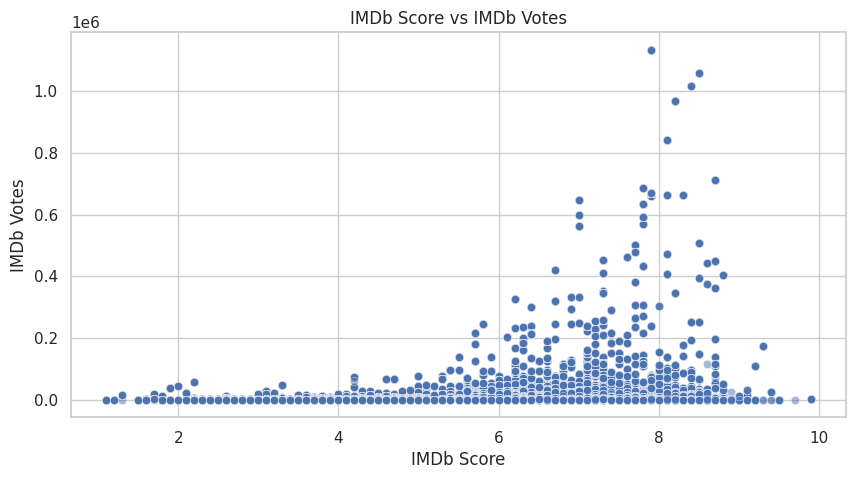

In [26]:
# Chart 6 - IMDb Score vs IMDb Votes
plt.figure(figsize=(10,5))
sns.scatterplot(data=merged_df, x="imdb_score", y="imdb_votes", alpha=0.5)
plt.title("IMDb Score vs IMDb Votes")
plt.xlabel("IMDb Score")
plt.ylabel("IMDb Votes")
plt.show()


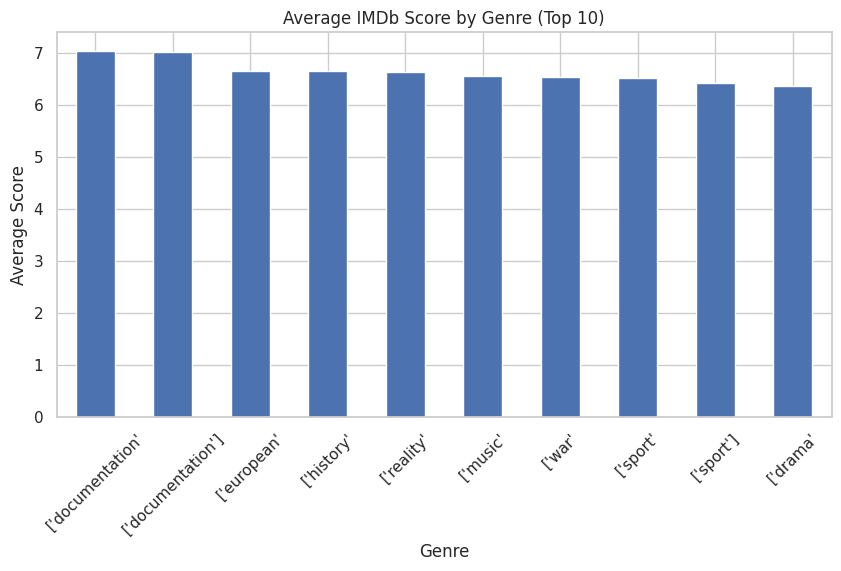

In [27]:
# Chart 7 - Avg IMDb Score by Genre
genre_rating = merged_df.groupby("main_genre")["imdb_score"].mean().sort_values(ascending=False)

genre_rating.head(10).plot(kind='bar', figsize=(10,5))
plt.title("Average IMDb Score by Genre (Top 10)")
plt.xlabel("Genre")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()


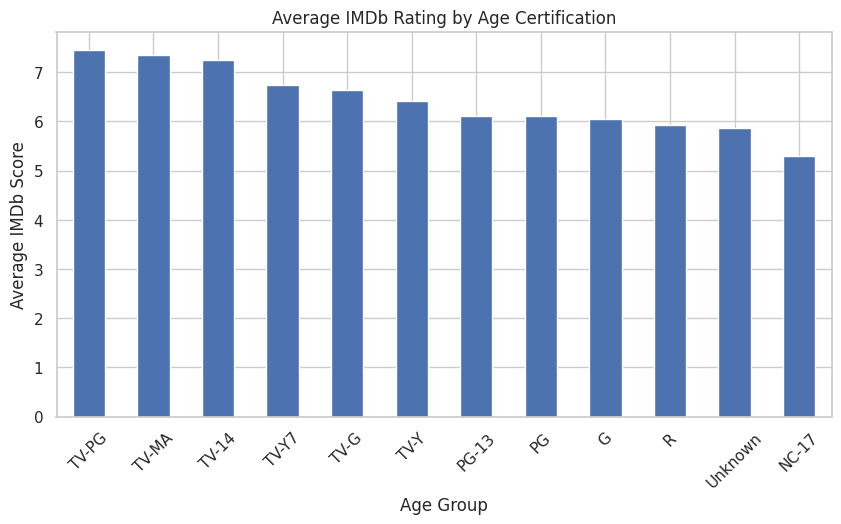

In [28]:
# Chart 8 - Average IMDb Score by Age Certification
age_rating = merged_df.groupby("age_certification")["imdb_score"].mean().sort_values(ascending=False)

age_rating.plot(kind="bar", figsize=(10,5))
plt.title("Average IMDb Rating by Age Certification")
plt.xlabel("Age Group")
plt.ylabel("Average IMDb Score")
plt.xticks(rotation=45)
plt.show()


In [30]:
merged_df.columns



Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role', 'main_genre'],
      dtype='object')

In [31]:
def extract_first_country(x):
    if pd.isna(x):
        return "Unknown"
    x = str(x)
    if "," in x:
        return x.split(",")[0].strip()
    return x.strip()

merged_df["main_country"] = merged_df["production_countries"].apply(extract_first_country)


In [32]:
merged_df["main_country"].head()


,main_country
0,['US']
1,['US']
2,['US']
3,['US']
4,['US']


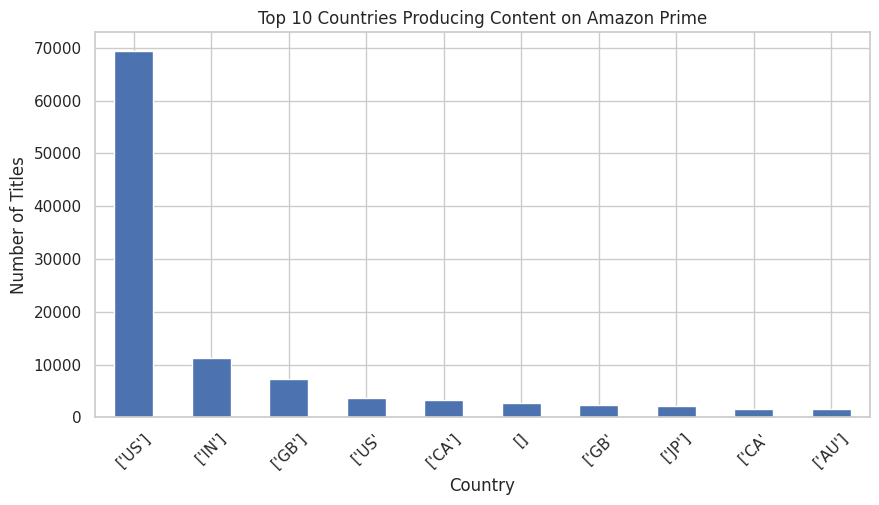

In [33]:
country_counts = merged_df["main_country"].value_counts().head(10)

country_counts.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Countries Producing Content on Amazon Prime")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


In [34]:
merged_df.select_dtypes(include=['float64', 'int64']).columns


Index(['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score', 'person_id'],
      dtype='object')

In [35]:
possible_num_cols = ["imdb_score", "imdb_votes", "runtime", "tmdb_popularity", "tmdb_score"]

num_cols = [col for col in possible_num_cols if col in merged_df.columns]

num_cols


['imdb_score', 'imdb_votes', 'runtime', 'tmdb_popularity', 'tmdb_score']

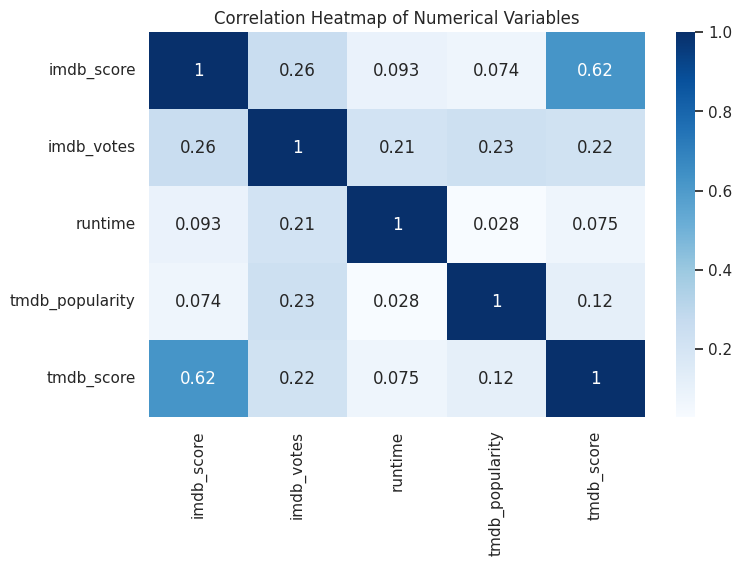

In [41]:
# Chart 10 - Correlation Heatmap (safe version)

possible_num_cols = ["imdb_score", "imdb_votes", "runtime", "tmdb_popularity", "tmdb_score"]

num_cols = [col for col in possible_num_cols if col in merged_df.columns]

corr = merged_df[num_cols].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


Business Recommendations
-----------------------------------------

✔ Invest more in Drama, Action, Crime & Thriller

✔ Promote high-rated but low-vote titles

✔ Increase Indian, Korean & Anime content

✔ Strengthen family-friendly content

✔ Focus on creators with consistently high ratings

-----------------------------------------
CONCLUSION
-----------------------------------------

This EDA provides valuable insights into Amazon Prime Video’s content quality, performance trends, genre strengths, viewer patterns, and global distribution. By analyzing ratings, votes, genres, certifications, and content growth over the years, Prime Video can optimize production investments, improve recommendations, and enhance user satisfaction. This analysis serves as a strong foundation for future predictive models such as rating prediction, content recommendation systems, and churn analysis.